# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv(r'C:\Users\leann\OneDrive\Desktop\SPRINGBOARD\Frequentist Case Study\insurance2.csv')

In [4]:
medical.shape

(1338, 8)

In [5]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

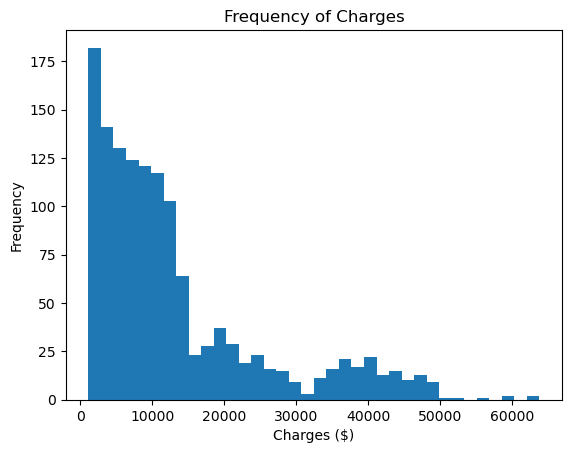

In [25]:
#calculating number of bins we should use (square root of number of data points)
n_bins = int(np.sqrt(1338))

#histogram of medical charges
_ = plt.hist(medical.charges, bins=n_bins)
_ = plt.xlabel('Charges ($)')
_ = plt.ylabel('Frequency')
_ = plt.title('Distribution of Charges')

In [27]:
#mean
medical_mean = np.mean(medical.charges)

print("Mean Charge: ${:.2f}".format(medical_mean))

#standard deviation
medical_std = np.std(medical.charges)

print("Standard Deviation: {:.2f}".format(medical_std))


Mean Charge: $13270.42
Standard Deviation: 12105.48


**Answer about appropriateness**... as the charges are skewed left, I don't think that looking at the mean tells us much, and it makes the standard deviation so high that it's pretty meaningless. 

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ I would resample a number of times using norm.rvs()

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ A one sided confidence interval is appropriate as we are only looking at the lower end of the data. The administrator does not need to be concerned as the lower bound of the 95% confidence interval is $12726

In [56]:
#calculating the critical value and the 95% confidence interval for the mean
n= medical.charges.count()
critical_value = t.ppf(0.95, df=(n-1))
print(critical_value)

1.6459941145571317


In [58]:
margin_error = critical_value * (medical_std/np.sqrt(n))
print('margin of error: ', margin_error)

confidence_interval_lower = (medical_mean - margin_error)

print('95% confidence interval lower bound: ',confidence_interval_lower)

margin of error:  544.7314053390934
95% confidence interval lower bound:  12725.690859802164


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ null hypothesis: People with insurance are charged the same as those without insurance
alternative hypothesis: People with insurance are charged a different amount as those without insurance

Assumptions about variances of the two groups: We assume that the groups are independent of each other and there are no other factors that impact charges.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [107]:
#calculating out my variables
#counts of insurance/no insurance
n0=medical[medical['insuranceclaim']==1]['insuranceclaim'].count()
n1=medical[medical['insuranceclaim']==0]['insuranceclaim'].count()
print('Has insurance count: ',n0)
print('No insurance count: ',n1)

#means of charges for the two groups
x0= medical[medical['insuranceclaim']==1]['charges'].mean()
x1= medical[medical['insuranceclaim']==0]['charges'].mean()
print('Has insurance mean: ',x0)
print('No insurance mean: ',x1)

#standard deviation of charges for the two grups
s0 = medical[medical['insuranceclaim']==1]['charges'].std()
s1 = medical[medical['insuranceclaim']==0]['charges'].std()
print('Has insurance standard deviation: ',s0)
print('No insurance standard deviation: ',s1)

#degrees of freedom
df= n0 + n1 - 2
print('degrees of freedom (df): ',df)

Has insurance count:  783
No insurance count:  555
Has insurance mean:  16423.928276537663
No insurance mean:  8821.421892306294
Has insurance standard deviation:  14045.928418802127
No insurance standard deviation:  6446.510126811736
degrees of freedom (df):  1336


In [113]:
#Pooled Standard Deviation:
sp_top = (n0 - 1)*s0**2 + (n1 - 1)*s1**2
#note that sp_bottom is the same as our degrees of freedom, which I've already calculated as df
sp_bottom = df
sp= np.sqrt(sp_top/sp_bottom)
print('Pooled Standard Deviation: ',sp)

#t-test statistic:
t_top = x0 - x1
t_bottom = sp* np.sqrt((1/n0) + (1/n1))
t=t_top/t_bottom
print('t-test statistic: ',t)

#to get p value: 
p_value = stats.t.sf(abs(t), df=df)*2
print('P value: ', p_value)


Pooled Standard Deviation:  11520.034268775256
t-test statistic:  11.89329903087671
P value:  4.461230231620972e-31


In [95]:
#USING SCIPI.STATS FUNCTION
import scipy.stats as stats
with_function = stats.ttest_ind(medical[medical['insuranceclaim']==1]['charges'], medical[medical['insuranceclaim']==0]['charges'])
print(with_function)

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)


CONCLUSION: We can reject the null hypothesis, and accept the alternative hypothesis that people with insurance are charged a different amount than people without insurance. The p value is extremely small, and the large t statistic indicates that there is a large difference between the means of the two groups. 

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ I cannot find any reference to a z test in scipy.stats, but in a different package called statsmodel, there is a ztest() function (statsmodels.stats.weightstats.ztest). 

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test